<a href="https://colab.research.google.com/github/kutikova2016/see-me/blob/master/R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("event_data_train.csv")
df['date'] = pd.to_datetime(df.timestamp, unit='s')
df['day'] = df.date.dt.date

df_sub = pd.read_csv("submissions_data_train.csv")
df_sub['date'] = pd.to_datetime(df_sub.timestamp, unit='s')
df_sub['day'] = df_sub.date.dt.date
df.head(9)

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
5,32811,1434340895,passed,17632,2015-06-15 04:01:35,2015-06-15
6,32929,1434340921,discovered,17632,2015-06-15 04:02:01,2015-06-15
7,32929,1434340921,viewed,17632,2015-06-15 04:02:01,2015-06-15
8,32929,1434340939,started_attempt,17632,2015-06-15 04:02:19,2015-06-15


In [0]:
df.action.describe()

count     3480703
unique          4
top        viewed
freq      1830830
Name: action, dtype: object

In [0]:
sns.set(rc={'figure.figsize': (12, 6)})

In [0]:
clever = df[df.action == 'passed']\
    .drop_duplicates(subset=['user_id', 'step_id'])\
        .groupby('user_id').count()\
            .reset_index()\
                .rename(columns={'step_id': 'kolich'})\
                    [['user_id', 'kolich']]
clever = clever[clever.kolich > 190].reset_index()['user_id']
clever 

0          16
1          22
2          30
3          34
4          39
        ...  
1073    26697
1074    26763
1075    26777
1076    26779
1077    26781
Name: user_id, Length: 1078, dtype: int64

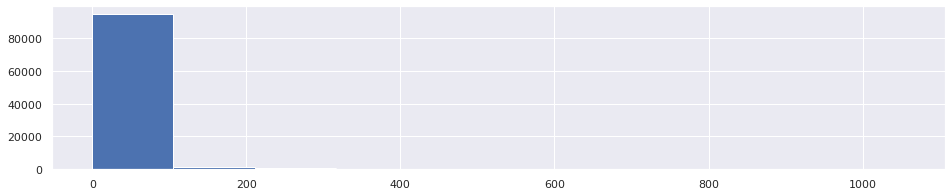

In [0]:
DF = df[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']).reset_index()\
    .groupby('user_id')['timestamp'].apply(list)\
    .apply(np.diff).values
DF = pd.Series(np.concatenate(DF, axis=0)) / (24*60*60) sq`d1fw e

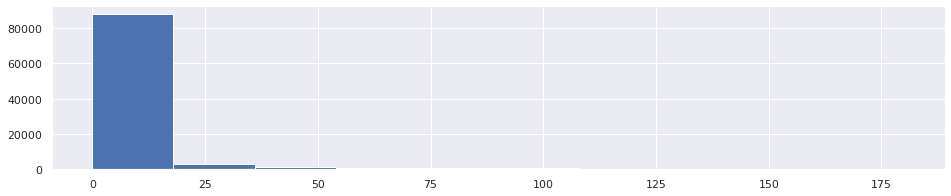

In [0]:
DF[DF < 180].hist()

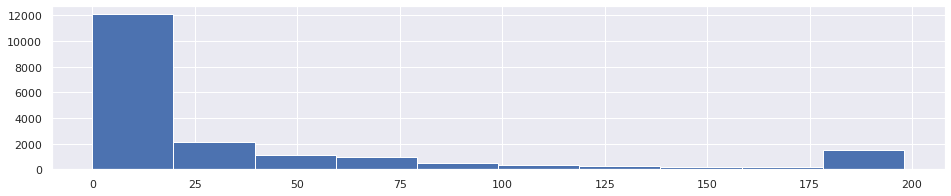

In [0]:
a = df.pivot_table(index='user_id',
               columns='action', 
               values='step_id',
               aggfunc='count',
               fill_value=0
).reset_index().discovered
a.hist()

In [0]:
q = (df.groupby('user_id').day.max() - df.groupby('user_id').day.min()).apply(lambda x: x.days)


user_id
1          0
2         56
3        118
5        390
7          0
        ... 
26790    764
26793      0
26794    194
26797     18
26798      0
Name: day, Length: 19234, dtype: int64

In [0]:
pd.DataFrame({'A': [1, 2,], 'B':[['a', 'c'], ['b', 'x']]})

,A,B
0,1,"[a, c]"
1,2,"[b, x]"


In [0]:
x = df.day[2000000] - df.day[0]
type(df.day[0])

datetime.date

In [0]:
q.describe()

count                       19234
mean      72 days 19:07:43.055006
std      175 days 09:22:24.853685
min               0 days 00:00:00
25%               0 days 00:00:00
50%               0 days 00:00:00
75%              38 days 00:00:00
max            1065 days 00:00:00
Name: day, dtype: object

In [0]:
df_sub.head()
df_sub.sort_values('user_id').head()

,step_id,timestamp,submission_status,user_id,date,day
114966,33540,1444568820,correct,3.0,2015-10-11 13:07:00,2015-10-11
114937,32075,1441452329,wrong,3.0,2015-09-05 11:25:29,2015-09-05
114936,32075,1441452308,wrong,3.0,2015-09-05 11:25:08,2015-09-05
114935,32031,1441443398,correct,3.0,2015-09-05 08:56:38,2015-09-05
114934,32031,1441443212,wrong,3.0,2015-09-05 08:53:32,2015-09-05


In [0]:
df1 = df.pivot_table(index='user_id',
               columns='action', 
               values='step_id',
               aggfunc='count',
               fill_value=0
)
df2 = df1[df1.passed == df1.passed.max()].head(10)
df2
df_sub

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2017-08-05
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2017-08-18
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2017-09-25
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2018-04-06


In [0]:
df1 = df_sub.pivot_table(index='user_id',
               columns='submission_status', 
               values='step_id',
               aggfunc='count',
               fill_value=0
)
df2 = df1[df1.correct >= df1.quantile(0.999).min()]
df2

submission_status,correct,wrong
user_id,,
1046,421,513
5552,186,93
6183,142,65
8461,135,42
17135,168,177


10

In [0]:
df = df[].groupby('user_id').filter(lambda g: )

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [0]:
df.groupby('day')\
    .user_id.nunique().plot()

In [0]:
df[(df.action == 'passed')]\
    .groupby('user_id', as_index=False)\
        .agg({'step_id': 'count'})\
            .rename(columns={'step_id': 'kol_steps'})\
                .kol_steps\
                    .hist()
                #.head()

In [0]:
df.groupby('user_id', as_index=False)
        .agg({'step_id': 'count'})\
            .rename(columns={'step_id': 'kol_steps'})\
                .kol_steps\
                    .hist()
                #.head()

In [0]:
pt = df.pivot_table(index='user_id', #в результате каждая строчка будет информацией о каждом уникальном index
               columns='action', #столбцы будут отвеать за уникальные значения columns 
               values='step_id', #в ячейках будет находиться информация по values
               aggfunc='count', #сгруппированная по aggfunc
               fill_value=0).reset_index()
pt.head(2)

action,user_id,discovered,passed,started_attempt,viewed
0,3.0,15,15,4,20
1,16.0,55,55,26,132


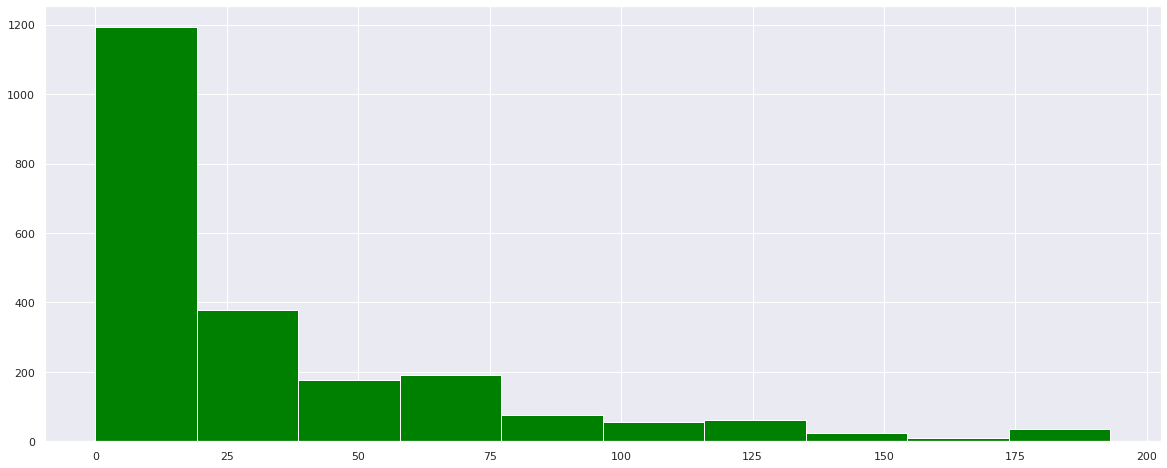

In [0]:
 a = plt.hist(pt.passed, ,color='green')


In [0]:
df.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632.0,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632.0,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632.0,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632.0,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632.0,2015-06-15 04:01:35,2015-06-15


In [0]:
x = pd.DataFrame({'A': [1, 2, 3, 4, 1], 'B': [4, 6, 7, 4, 4], 'C': [-3, 8, 9, 10, 40]})
x['B_1'] = x['B']
G = x.pivot_table(index='A', 
              columns='B',
              values='C', 
              aggfunc='count',
              fill_value=0
).rename(columns={4:'4', 6:'6', 7:'7'})
print(G['4'])
G.info()

A
1    2
2    0
3    0
4    1
Name: 4, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 1 to 4
Data columns (total 3 columns):
4    4 non-null int64
6    4 non-null int64
7    4 non-null int64
dtypes: int64(3)
memory usage: 128.0 bytes


In [0]:
def kount(h):
    q = h[h == 4]
    #print(q, type(q))
    #print('L:', len(q))
    return len(q)

x.groupby('A')\
        .agg({'B': 'kount'})
1

In [0]:
help(x.groupby)

In [0]:
df_sub.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [0]:
df_sub.pivot_table(index='user_id', 
              columns='submission_status',
              values='date', 
              aggfunc='count',
              fill_value=0
    
).head(10)

submission_status,correct,wrong
user_id,,
2,2,0
3,29,23
5,2,2
8,9,21
14,0,1
16,77,106
17,0,2
22,76,47
25,1,4


In [0]:
a1 = 3
for i in range(10):
    print(i+1, a1+10.44*i)

In [0]:
from sklearn.ensemble import RandomForestClassifier as RFC
help(RFC)